# Introduction to Text as Data

## UNM Workshop, April 9, 2018

Alex Hanna, PhD ([Email](alex.hanna@utoronto.ca) | [GitHub](https://github.com/alexhanna) | [Web](alex-hanna.com))

## What are Text as Data methods?

Text as data (TAD) methods are a body of different computational methods for doing analysis of natural language. TAD is drawn from a number of different fields, including computational linguistics, natural language processing, and machine learning.

TAD as a body of methods has grown as a means of dealing with large amounts of political and social text. Within sociology, TAD has been largely used as a means of studying culture and institutional logics (Mohr and Bogdanov 2013; Nelson 2017). There's been a more widespread adoption of TAD within political science and political methodology more specifically. Earlier interventions into this space focused on ideological scaling (Laver, Benoit, and Garry 2003; Slapin and Proksch 2008), i.e. identifying ideological positions of political actors via some kind of written or spoken text. More recent work has focused on classification of text, either based on known categories or unknown categories. Categories can be diverse as political sentiment towards a particular topic or politician (Hopkins and King 2010) to types of protest speech (Hanna 2013) to political credit taking (Grimmer). 

There's a separate but related strain of TAD which is less concerned with ideological scaling or categorization and more concerned with event data creation. There's a long history of this methodology, largely pioneered by Schrodt (reviews in 2006; 2011). This has been a space of intervention for both Dr. Osorio and myself (Osorio diss; Hanna diss).

The figure below displays directives of how to choose a particular TAD method for your own purposes. The article from which it comes (Grimmer and Stewart 2013) provides an excellent set of procedures for performing TAD transparently, replicably, and validly.

![overview of TAD](img/Grimmer-Stewart-mod.png)

#### Exercise 1

1. I want to classify Congressional press releases based on a classification scheme I've generated through a literature review. Which method(s) could I consider using?
2. I want to generate a set of topics from a bunch of House floor speeches. Which method(s) could I consider using?


### Learning Objectives

In today's workshop, we're going to combine the [tidyverse workflow CHECK LINK](https://cran.r-project.org/web/packages/tidyverse/doc/manifesto.html) with a set of common TAD goals. The tidyverse is a group of R packages created by Hadley Wickham and others which prioritizes a common representation of data and data workflows. You should have gotten at least a little bit of exposure to the tidyverse prior to this workshop. If not, that's still fine. But make sure to look up any particular verbs which aren't familiar. 

By the end of the workshop, you should be able 

- understand the data flow of `tidyverse` and `tidytext`
- count the most common words from a particular text
- compare two texts for most common words
- apply a structural topic model to a set of documents using `stm`

### Using `tidytext`

[`tidytext`](https://cran.r-project.org/web/packages/tidytext/vignettes/tidytext.html) is an R package develped by Julia Silge and David Robinson, created for the purpose of integrating text processing methods into the tidyverse. This package allows us to preprocess text in a number of ways, such as converting it to lowercase, removing stopwords, and tokenizing it. It also allows us to convert between different methods for importing into other text packages. We'll get into what this all means below.

Let's start with single text, in this case, Mary Wollenstonecraft's *A Vindication of the Rights of Woman*. This work is considered a cornerstone of political philosophy in first-wave feminism. Inspired by Laura Nelson's own interrogation of feminist texts, let's start digging into some of its language.

First let's load the `tidyverse`, `tidytext`, and `gutenbergr`, a package developed by David Robinson which allows us to easily load in books from Project Gutenberg with only an numerical ID or a title.

In [87]:
library(tidyverse)
library(tidytext)
library(gutenbergr)

Next, we're going to download *Vindication* and convert it to tidy format. We'll rename the column name to `lines` for clarity.

In [90]:
## A Vindication of the Rights of Woman by Mary Wollstonecraft
#vindication <- gutenberg_download(3420)
#vindication

milton <- read_lines('milton-paradise.txt')
vindication <- tidy(milton) %>% rename(lines = x)
vindication

lines
[Paradise Lost by John Milton 1667]
""
""
Book I
""
""
"Of Man's first disobedience, and the fruit"
Of that forbidden tree whose mortal taste
"Brought death into the World, and all our woe,"
"With loss of Eden, till one greater Man"


Project Gutenberg gives us a text as a set of lines. Next, we're going to use one of the workhorse "verbs" of `tidytext` to convert text to lowercase and *tokenize* the text.  

On the level of meaning, the lowercase and uppercase of a word generally mean the same thing (sometimes they don't, though. For instance, an SMS saying 'Thank you.' means something different from one saying 'THANK YOU.'). But for the most part, we will want to convert to lowercase.

Secondly, we want to split the text by some kind of rule. This is the process of tokenization. For many applications, we mostly want to split by individual words and remove punctuation. 

`unnest_tokens` takes two mandatory arguments in this format -- the output column name and the input column name. We can call the output column `word`.

In [92]:
tidy_vindication <- vindication %>% 
    unnest_tokens(word, lines)
tidy_vindication

word
paradise
lost
by
john
milton
1667
book
i
of
man's


The output of `unnest_tokens` with no other arguments is a list of each word (or token) in order. For some purposes, we may also want to use conjunctions of multiple words, or n-grams. This allows us to have a little more context for the word. For instance, there's more meaning in "white house" than in "white" or "house" alone. 

In [108]:
vindication %>% unnest_tokens(word, lines, token = "ngrams", n = 2)

word
paradise lost
lost by
by john
john milton
milton 1667
1667 book
book i
i of
of man's
man's first


This one-per-row format lends itself nicely to other functions of the tidyverse. We can now do things like count unique items, join words with other data, and summarize across useful common variables.

The most basic thing we can begin to do is simply count the top words in the text. Using the `count` verb makes this straightforward.

In [110]:
tidy_vindication %>% count(word, sort = TRUE)

word,n
and,3395
the,2968
to,2228
of,2050
in,1366
his,1170
with,1160
or,715
that,704
all,700


Nothing too exciting here. Most of the top words are common words, like "and" or "the". These are what are known as *stop words* and we typically want to remove them from analysis. Luckily, there's another verb we can use to this, called `anti_join`. Simply put, this will join a dataset on common elements and remove those elements from the dataset. In this case, we'll join the list of English stop words with the list of single words, then we'll count them again.

In [114]:
tidy_vindication %>%
    anti_join(stop_words) %>%
    count(word, sort = TRUE)

Joining, by = "word"


word,n
thou,432
thy,414
heaven,366
thee,358
god,245
earth,207
death,121
till,120
hell,116
hath,113


In [123]:
## bigram stopword removal
bigrams <- vindication %>%
    unnest_tokens(bigram, lines, token = "ngrams", n = 2) %>%
    separate(bigram, c("word1", "word2"), sep = " ") %>%
    filter(!word1 %in% stop_words$word) %>%
    filter(!word2 %in% stop_words$word) %>%
    count(word1, word2, sort = TRUE)
bigrams

word1,word2,n
thou,hast,33
thou,art,23
hast,thou,19
thou,seest,14
thou,knowest,13
thou,shalt,13
arch,angel,12
god,hath,12
thou,didst,11
thou,mayest,10


Now we're getting somewhere. We're getting some important words from this text, like ... CHANGE ME.

#### Exercise 2

1. Load our second feminist text, "The Subjection of Women" by John Stuart Mill from `gutenbergr`. The ID is 27083. Store it in a variable called `subjection`.
2. Convert subjection to a list of words using tidytext and store it in `tidy_subjection`.
3. Count the words in the text without stop words.
4. Show the top 20 words in the counted word list. You'll need to use the tidyverse verb `top_n`.

### Comparing texts

* * *

#### 2. Graphing the prevalence of words in two texts

In [147]:
## A Vindication of the Rights of Woman by Mary Wollstonecraft
vindication <- gutenberg_download(3420)

ERROR: Error: Terminated by user


In [146]:
## The Subjection of Women by John Stuart Mill
subjection <- gutenberg_download(27083)

ERROR: Error: Terminated by user


In [ ]:
tidy_subjection <- subjection %>% 
    unnest_tokens(word, lines) %>%
    anti_join(stop_words) 

tidy_vindication <- vindication %>% 
    unnest_tokens(word, lines) %>%
    anti_join(stop_words) 

In [134]:
tidy_books <- bind_rows(mutate(tidy_subjection, author = 'Mills'), 
                        mutate(tidy_vindication, author = 'Wollstonecraft'))

In [137]:
word_ratios <- tidy_books %>%
    count(word, author) %>%
    filter(sum(n) >= 10) %>%
    ungroup() %>%
    spread(author, n, fill = 0) %>%
    mutate_if(is.numeric, funs((. + 1) / sum(. + 1))) %>%
    mutate(logratio = log(Mills / Wollstonecraft)) %>%
    arrange(desc(logratio))

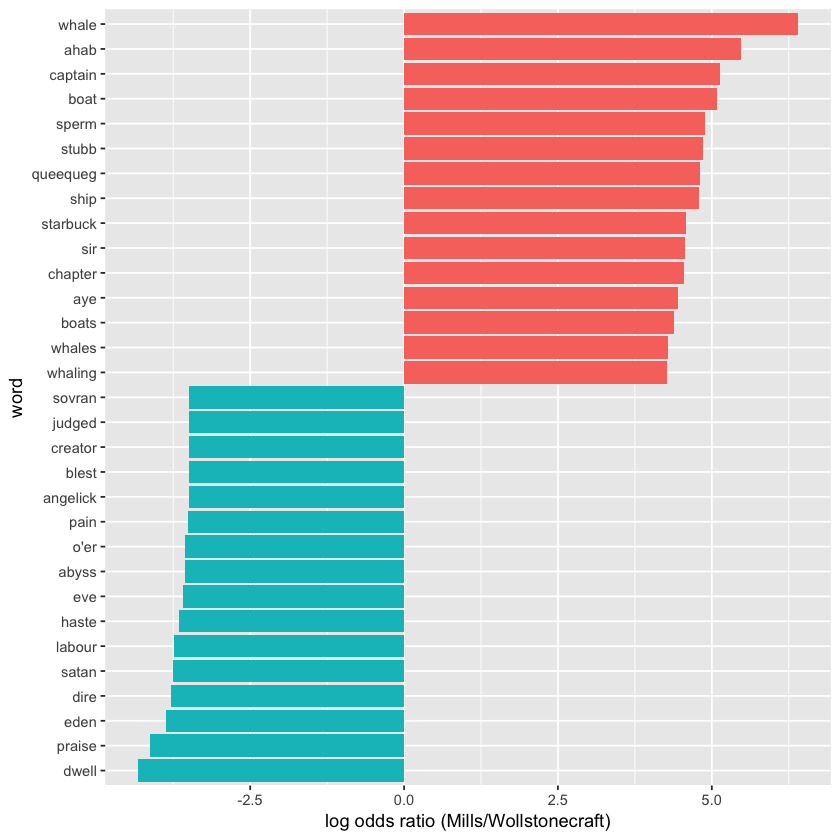

In [142]:
word_ratios %>%
    group_by(logratio < 0) %>%
    top_n(10, abs(logratio)) %>%
    ungroup() %>%
    mutate(word = reorder(word, logratio)) %>%
    ggplot(aes(word, logratio, fill = logratio < 0)) +
    geom_col(show.legend = FALSE) + 
    coord_flip() + 
    ylab("log odds ratio (Mills/Wollstonecraft)") + 
    scale_fill_discrete(name = "", labels = c("Mills", "Wollstonecraft"))

#### 3. Generating structured topic models from a corpus

In [116]:
library(stm)
library(stringr)

In [118]:
sotu_tweets <- read_csv('https://github.com/alexhannna/unm-text-as-data/sotu-text.csv', 
                        col_names = c('tweet'))

Parsed with column specification:
cols(
  tweet = col_character()
)


In [75]:
sotu_tweets$id <- seq(1, nrow(sotu_tweets))

In [121]:
## remove links
## unnest
## remove stopwords
tidy_sotu_tweets <- sotu_tweets %>% 
    mutate(tweet = str_replace(tweet, 'https://.+', '')) %>%
    unnest_tokens(word, tweet) %>%
    anti_join(stop_words) %>%
    filter(word != "sotu")

Joining, by = "word"


In [108]:
sotu_dfm <- tidy_sotu_tweets %>% 
    count(id, word, sort = TRUE) %>%
    cast_dfm(id, word, n)

In [122]:
topic_model <- stm(sotu_dfm, K = 10, 
                   verbose = FALSE, init.type = "Spectral")

In [123]:
summary(topic_model)

A topic model with 10 topics, 1499 documents and a 4833 word dictionary.


Topic 1 Top Words:
 	 Highest Prob: puerto, rico, fema, https, t.co, aid, electricity 
 	 FREX: mandate, electricity, puerto, individual, honor, rico, fema 
 	 Lift: 1,800, 160, 1742, 2019, 695, 9md2zbbmty, abc 
 	 Score: puerto, rico, fema, officially, shut, electricity, maria 
Topic 2 Top Words:
 	 Highest Prob: immigrant, shooter, tonight, people, democrats, church, realdonaldtrump 
 	 FREX: shooter, hook, aurora, charleston, columbine, shooters, theater 
 	 Lift: 365, 4357, 662, 75, 800, analogy, appeal 
 	 Score: shooter, immigrant, church, vegas, hook, aurora, charleston 
Topic 3 Top Words:
 	 Highest Prob: trump, president, speech, people, tonight, national, era 
 	 FREX: 1950s, appears, bygone, goal, normalization, nostalgic, supporters 
 	 Lift: 1️⃣, 2️⃣, 3️⃣, 90, acknowledged, aggressiveness, alexsmith 
 	 Score: trump, era, national, 1950s, appears, bygone, goal 
Topic 4 Top Words:
 	 Highest Prob: immigration, migration, chain, million, reform, based, trump's 
 	 FREX: syst

In [124]:
td_beta <- tidy(topic_model)

Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'that’s' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'that’s' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'that’s' in 'mbcsToSbcs': dot substituted for <99>”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'that’s' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'that’s' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'that’s' in 'mbcsToSbcs': dot substituted for <99>”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$la

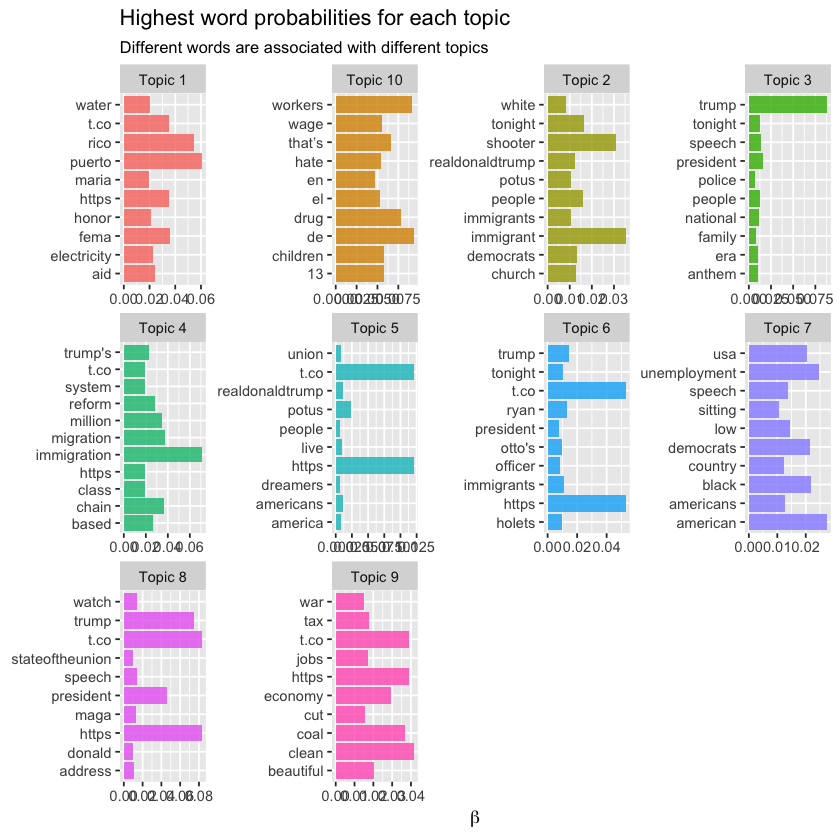

In [125]:
td_beta %>%
    group_by(topic) %>%
    top_n(10, beta) %>%
    ungroup() %>%
    mutate(topic = paste0("Topic ", topic), term) %>%
    ggplot(aes(term, beta, fill = as.factor(topic))) +
    geom_col(alpha = 0.8, show.legend = FALSE) +
    facet_wrap(~ topic, scales = "free") +
    coord_flip() +
    labs(x = NULL, y = expression(beta),
         title = "Highest word probabilities for each topic",
         subtitle = "Different words are associated with different topics")